In [1]:
from shouterlog import Shouter
# optional
import logging

### 1. Initialize Shouter Class

In [2]:
shouter = Shouter(
    # optional/ required
    supported_classes = (),
    # optionally 
    ## Formatting settings
    dotline_length = 50,
    auto_output_type_selection = True,
    show_function = True,
    show_traceback = False,
    # For saving records
    tears_persist_path = 'log_records.json',
    datetime_format = "%Y-%m-%d %H:%M:%S",
    # For saving env
    persist_env = False,
    env_persist_path = 'environment.dill',
    ## Logger settings
    logger = None,
    logger_name = 'Shouter',
    loggerLvl = logging.DEBUG,
    logger_format = '(%(asctime)s) : %(name)s : [%(levelname)s] : %(message)s'
)


### 2. Basic usage like logging

In [3]:
shouter.debug(
    # optional
    dotline_length=30)
shouter.debug("This is a debug message!")
shouter.info("This is an info message!")
shouter.warning("This is a warning message!")
shouter.error("This is an error message!")
shouter.fatal("This is a fatal message!")
shouter.critical("This is a critical message!")

(2026-01-05 23:34:12,197) : Shouter : [DEBUG] : _format_mess:==============================
(2026-01-05 23:34:12,199) : Shouter : [DEBUG] : _format_mess:This is a debug message!
(2026-01-05 23:34:12,201) : Shouter : [INFO] : _format_mess:This is an info message!
(2026-01-05 23:34:12,203) : Shouter : [WARNING] : _format_mess:This is a warning message!
(2026-01-05 23:34:12,204) : Shouter : [ERROR] : _format_mess:This is an error message!
(2026-01-05 23:34:12,206) : Shouter : [CRITICAL] : _format_mess:This is a fatal message!
(2026-01-05 23:34:12,208) : Shouter : [CRITICAL] : _format_mess:This is a critical message!


### 3. Using different output types

In [4]:
# Different types of outputs
shouter.info(output_type="dline")
shouter.info(output_type="HEAD1", mess="Header Message")

(2026-01-05 23:34:12,214) : Shouter : [INFO] : _format_mess:==================================================
(2026-01-05 23:34:12,216) : Shouter : [INFO] : _format_mess:
-----------------Header Message----------------- 


### 4. Custom logger configuration

In [5]:
import logging

# Custom logger
custom_logger = logging.getLogger("CustomLogger")
custom_logger.setLevel(logging.INFO)

# Shouter with custom logger
shouter_with_custom_logger = Shouter(supported_classes=(), logger=custom_logger)
shouter_with_custom_logger.info(mess="Message with custom logger")

### 5. Backwards compatibility with existing loggers

In [6]:
import logging
import attrsx

@attrsx.define
class ExampleClass:

            
    def print_debug(self):

        a = 0

        self.logger.debug("This is a debug message!", save_vars = ["a"])
        
    def print_info(self):
        
        self.logger.info("This is a info message!")
        
    def print_warning(self):
        
        self.logger.warning("This is a warning message!")
        
    def print_error(self):
        
        self.logger.error("This is a error message!", label = "TEST")
        
    def print_critical(self):
        
        self.logger.critical("This is a critical message!")
        
    def perform_action_chain_1(self):
        
        self.logger.debug("Action 1")
        self.print_debug()
                
        self.logger.debug("Action 2")
        self.print_error()
        
    def perform_action_chain_2(self):
                
        a = 1
        b = 'b'
        c = ['list']
        d = {'key' : 'value'}
        e = Shouter()
        
        self.logger.info("Logging vars", save_vars = ["a","b","e"])
        self.logger.error("Saving env", label = "TEST")

In [7]:
ec = ExampleClass()

ec.print_debug()
ec.print_info()
ec.print_warning()
ec.print_error()
ec.print_critical()

INFO:ExampleClass:This is a info message!
ERROR:ExampleClass:This is a error message!
CRITICAL:ExampleClass:This is a critical message!


In [8]:
shouter_for_example_class = Shouter(
    supported_classes = (ExampleClass,),
    tears_persist_path = 'log_records.json'
)

ec = ExampleClass(logger=shouter_for_example_class)

ec.print_debug()
ec.print_info()
ec.print_warning()
ec.print_error()
ec.print_critical()
ec.perform_action_chain_1()

INFO:Shouter:ExampleClass.print_info:This is a info message!
ERROR:Shouter:ExampleClass.print_error:This is a error message!
CRITICAL:Shouter:ExampleClass.print_critical:This is a critical message!
ERROR:Shouter:ExampleClass.print_error:+ This is a error message!


### 6. Built-in records from Shouter usage

In [9]:
shouter_for_example_class = Shouter(
    supported_classes = (ExampleClass,),
    tears_persist_path = 'log_records.json'
)

ec = ExampleClass(logger=shouter_for_example_class)

ec.print_debug()
ec.perform_action_chain_1()

ERROR:Shouter:ExampleClass.print_error:+ This is a error message!


In [10]:
import pandas as pd

pd.DataFrame(ec.logger.return_logged_tears())

,idx,call_id,datetime,level,function,mess,line,lines,is_proc,proc_name,traceback,label,env
0,1,124165912314352,2026-01-05 23:34:12,debug,ExampleClass.print_debug,This is a debug message!,12,[12],False,Task-2,[ExampleClass.print_debug],None,{'a': 0}
1,2,124165917350880,2026-01-05 23:34:12,debug,ExampleClass.perform_action_chain_1,Action 1,32,[32],False,Task-2,[ExampleClass.perform_action_chain_1],None,{}
2,3,109462141702832,2026-01-05 23:34:12,debug,ExampleClass.print_debug,This is a debug message!,12,"[12, 33]",False,Task-2,"[ExampleClass.print_debug, ExampleClass.perfor...",None,{'a': 0}
3,4,124165917350880,2026-01-05 23:34:12,debug,ExampleClass.perform_action_chain_1,Action 2,35,[35],False,Task-2,[ExampleClass.perform_action_chain_1],None,{}
4,5,109462142051424,2026-01-05 23:34:12,error,ExampleClass.print_error,This is a error message!,24,"[24, 36]",False,Task-2,"[ExampleClass.print_error, ExampleClass.perfor...",TEST,{}


### 7. Debugging errors with Shouter

In [11]:
shouter_for_example_class = Shouter(
    supported_classes = (ExampleClass,),
    tears_persist_path = 'log_records.json',
    persist_env = True,
    env_persist_path = 'environment.dill'
)

ec = ExampleClass(logger=shouter_for_example_class)

ec.print_debug()
ec.perform_action_chain_2()

INFO:Shouter:ExampleClass.perform_action_chain_2:Logging vars
ERROR:Shouter:ExampleClass.perform_action_chain_2:Saving env


In [12]:
ec.logger.return_last_words(
    # optional
    env_persist_path = 'environment.dill'
)

{'a': 1,
 'b': 'b',
 'c': ['list'],
 'd': {'key': 'value'},
 'e': Shouter(supported_classes=(), dotline_length=50, auto_output_type_selection=True, show_function=True, show_traceback=False, show_idx=False, tears_persist_path='log_records.json', env_persist_path='environment.dill', datetime_format='%Y-%m-%d %H:%M:%S', log_records=[], persist_env=False, lock=<unlocked _thread.lock object at 0x70ed6cd6f940>, last_traceback=[], log_plotter_h=None, log_plotter_class=<class 'shouterlog.shouterlog.LogPlotter'>, log_plotter_params={}, loggerLvl=20, logger_name=None, logger_format='%(levelname)s:%(name)s:%(message)s')}

### 8. Plotting execution flow and reviewing steps

In [13]:
import attrsx

@attrsx.define(handler_specs={
    "example1" : ExampleClass
},
    logger_chaining={
    'logger' : True
})
class MainExampleClass:

    def __attrs_post_init__(self):

        self._initialize_example1_h()

    def print_example_print(self):

        self.logger.debug("Printing from example!", label = "START")

        for i in range(5):

            self.example1_h.print_debug()

        self.logger.debug("Printing from example!", label = "END")


In [14]:
shouter_for_main_example_class = Shouter(
    supported_classes = (MainExampleClass, ExampleClass,),
    tears_persist_path = 'log_records2.json',
    loggerLvl=logging.DEBUG
)

mec = MainExampleClass(logger=shouter_for_main_example_class)

mec.print_example_print()

DEBUG:Shouter:MainExampleClass.print_example_print:Printing from example!
DEBUG:Shouter:ExampleClass.print_debug:+ This is a debug message!
DEBUG:Shouter:ExampleClass.print_debug:+ This is a debug message!
DEBUG:Shouter:ExampleClass.print_debug:+ This is a debug message!
DEBUG:Shouter:ExampleClass.print_debug:+ This is a debug message!
DEBUG:Shouter:ExampleClass.print_debug:+ This is a debug message!
DEBUG:Shouter:MainExampleClass.print_example_print:Printing from example!


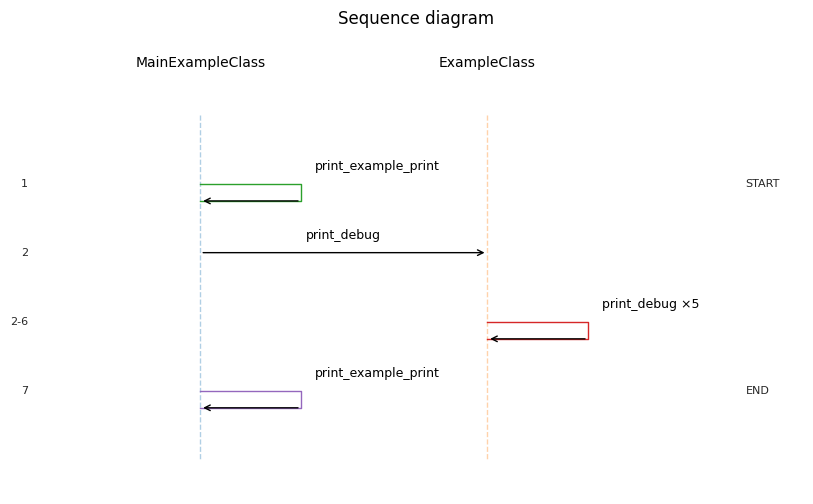

In [17]:
mec.logger.show_sequence_diagram()

In [18]:
mec.logger.show_logs_by_id(ids = [1,2])

[{'idx': 1,
  'call_id': 124165157051456,
  'datetime': '2026-01-05 23:34:12',
  'level': 'debug',
  'function': 'MainExampleClass.print_example_print',
  'mess': 'Printing from example!',
  'line': 17,
  'lines': [17],
  'is_proc': False,
  'proc_name': 'Task-2',
  'traceback': ['MainExampleClass.print_example_print'],
  'label': 'START',
  'env': {}},
 {'idx': 2,
  'call_id': 109462141702832,
  'datetime': '2026-01-05 23:34:12',
  'level': 'debug',
  'function': 'ExampleClass.print_debug',
  'mess': 'This is a debug message!',
  'line': 12,
  'lines': [12, 21],
  'is_proc': False,
  'proc_name': 'Task-2',
  'traceback': ['ExampleClass.print_debug',
   'MainExampleClass.print_example_print'],
  'label': None,
  'env': {'a': 0}}]